In [23]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score

In [5]:
#Generating dataset using make_blobs function in the sklearn.datasets class
from sklearn.datasets import make_blobs

In [6]:
#Generating 2000 samples with 3 features (X) with one label (y)
X, y = make_blobs(n_samples=2000, centers=5, n_features=3, random_state=0)
X.shape

(2000, 3)

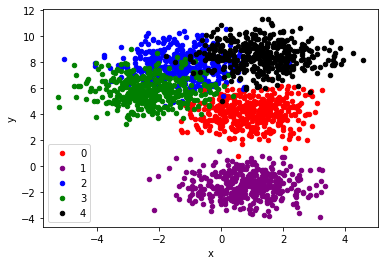

In [7]:
#Exploring and analysing raw data
from pandas import DataFrame
from matplotlib import pyplot

df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'purple', 2:'blue', 3:'green', 4:'black'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [8]:
df.head()

,x,y,label
0,-2.533331,6.548725,2
1,-4.369632,6.377577,3
2,1.530365,4.957573,0
3,0.950258,8.067168,4
4,0.438700,8.915091,4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       2000 non-null   float64
 1   y       2000 non-null   float64
 2   label   2000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


In [10]:
df.describe()

,x,y,label
count,2000.000000,2000.000000,2000.000000
mean,-0.110206,4.982723,2.000000
std,1.750519,3.705361,1.414567
min,-5.270870,-3.892001,0.000000
25%,-1.433888,3.521267,1.000000
50%,0.112322,5.873096,2.000000
75%,1.260989,7.864442,3.000000
max,4.572122,11.318169,4.000000


In [11]:
#Checking Null elements and analysing
df.isna().sum()

x        0
y        0
label    0
dtype: int64

In [12]:
#Enconding Labels
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

label_encoder = LabelEncoder()
df["Label"] = label_encoder.fit_transform(df["label"])
df.head()

,x,y,label,Label
0,-2.533331,6.548725,2,2
1,-4.369632,6.377577,3,3
2,1.530365,4.957573,0,0
3,0.950258,8.067168,4,4
4,0.438700,8.915091,4,4


In [13]:
df["Label"].value_counts()

4    400
3    400
2    400
1    400
0    400
Name: Label, dtype: int64

In [14]:
categories = list(set(df.label))
df.drop(["label"], axis=1, inplace=True)
df.head()

,x,y,Label
0,-2.533331,6.548725,2
1,-4.369632,6.377577,3
2,1.530365,4.957573,0
3,0.950258,8.067168,4
4,0.438700,8.915091,4


In [15]:
df.corr()

,x,y,Label
x,1.000000,-0.224499,-0.193133
y,-0.224499,1.000000,0.614131
Label,-0.193133,0.614131,1.000000


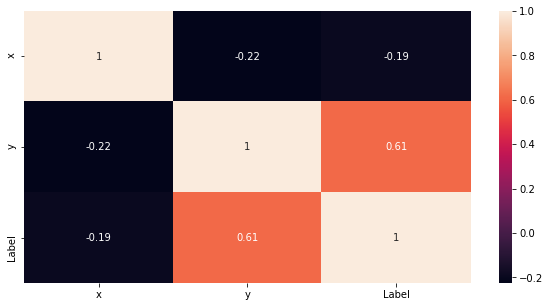

In [16]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,5))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

In [17]:
#Locating features and label
X,y = df.iloc[:,:-1], df.iloc[:,-1]

#Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_test

,x,y
405,2.098990,-0.287123
1190,1.878659,9.437678
1132,-1.072182,8.178749
731,-2.956746,6.468182
1754,1.662250,2.684034
...,...,...
841,0.967203,-1.289644
108,-0.655172,8.808400
665,-2.196679,4.599465
1214,2.211871,9.013786


In [18]:
#Preprocessing for classification
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4 ,random_state=0)
clf.fit(X_train, y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))
print("\nBias for training:",1-clf.score(X_train,y_train))
print("Bias for test:",1-clf.score(X_test,y_test))
print("\nVariance:",(1-clf.score(X_test,y_test))-(1-clf.score(X_train,y_train)))

Accuracy of train: 0.8764285714285714
Accuracy of test: 0.8783333333333333

Bias for training: 0.12357142857142855
Bias for test: 0.1216666666666667

Variance: -0.0019047619047618536


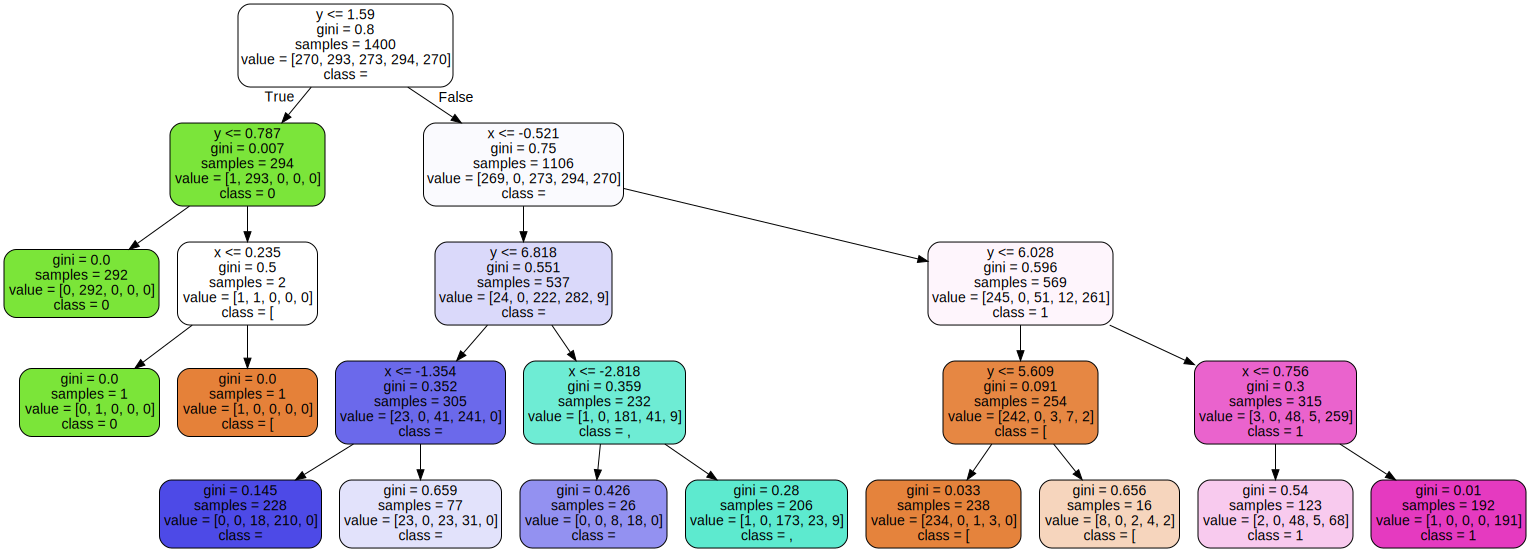

In [19]:
#Decision Tree Algorithm
dot_df = export_graphviz(clf, out_file=None,
                     feature_names=X.columns,
                     class_names=str(categories),
                     filled=True, rounded=True)
graph = graphviz.Source(dot_df)
graph

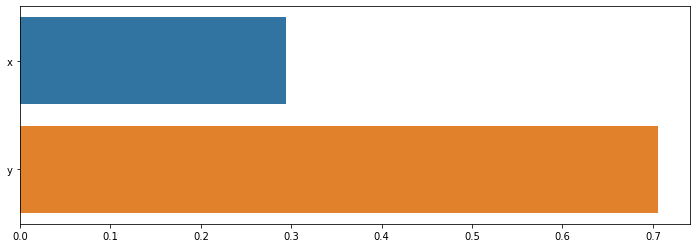

In [20]:
#Feature Importance
plt.figure(figsize=(12, 4))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [21]:
#For Classification Report Plotting
y = np.random.randint(low=0, high=10, size=100)
y_p = np.random.randint(low=0, high=10, size=100)

def plot_classification_report(y_tru, y_prd, figsize=(5, 5), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(y_tru))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       130
           1       1.00      1.00      1.00       107
           2       0.83      0.68      0.75       127
           3       0.77      0.83      0.80       106
           4       0.82      0.97      0.89       130

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



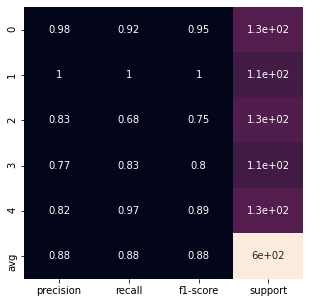

In [25]:
# Classification Report
pred = clf.predict(X_test)
print(classification_report(y_test,pred))
plot_classification_report(y_test, pred)

In [26]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.88120408974687
Recall = 0.8799323451767368
Accuracy = 0.8783333333333333
F1 Score = 0.8773804103409265


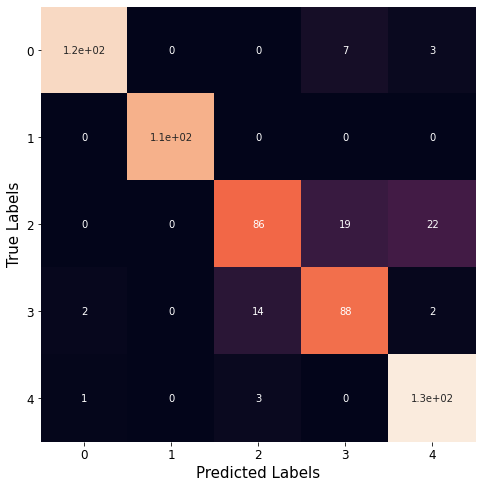

In [27]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [28]:
#XGBoost Algorithm 
import xgboost as xgb

dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

param = {'max_depth':4, 
         'eta':1, 
         'objective':'multi:softprob', 
         'eval_metric':'mlogloss',
         'num_class':5}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

categories

[0, 1, 2, 3, 4]

In [29]:
#Predictions
preds = model.predict(dmatrix_test)
preds[:10]

array([[1.8727792e-03, 9.9496621e-01, 1.0138052e-03, 9.4431901e-04,
        1.2028894e-03],
       [1.2905191e-03, 1.1962507e-03, 1.5011730e-03, 1.3447949e-03,
        9.9466729e-01],
       [7.1220514e-03, 6.6018072e-03, 9.0306520e-01, 5.6831464e-02,
        2.6379498e-02],
       [4.8094043e-03, 3.7048582e-03, 4.3051362e-02, 9.4449121e-01,
        3.9432030e-03],
       [9.9356043e-01, 1.3539876e-03, 1.6310542e-03, 1.5192617e-03,
        1.9352612e-03],
       [5.8046165e-03, 5.3806072e-03, 9.5649308e-01, 1.9103253e-02,
        1.3218442e-02],
       [1.2905191e-03, 1.1962507e-03, 1.5011730e-03, 1.3447949e-03,
        9.9466729e-01],
       [6.9160266e-03, 6.4108316e-03, 8.7694156e-01, 1.0072808e-01,
        9.0035126e-03],
       [1.2905191e-03, 1.1962507e-03, 1.5011730e-03, 1.3447949e-03,
        9.9466729e-01],
       [5.7681571e-03, 5.3468104e-03, 9.5048523e-01, 1.7035061e-02,
        2.1364782e-02]], dtype=float32)

In [30]:
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

array([1, 4, 2, 3, 0, 2, 4, 2, 4, 2, 3, 0, 1, 0, 4, 3, 0, 3, 0, 0, 1, 3,
       1, 2, 4, 4, 0, 1, 4, 0, 2, 2, 4, 2, 3, 2, 3, 0, 3, 0, 1, 0, 4, 3,
       4, 0, 1, 4, 3, 3, 1, 0, 2, 4, 2, 4, 2, 0, 0, 2, 0, 2, 1, 1, 4, 1,
       4, 1, 2, 1, 4, 1, 2, 4, 2, 1, 3, 3, 2, 0, 2, 4, 1, 2, 2, 2, 4, 4,
       0, 4, 1, 1, 0, 0, 1, 1, 1, 4, 4, 3, 2, 0, 1, 0, 1, 0, 2, 3, 4, 4,
       0, 2, 3, 0, 2, 3, 4, 2, 1, 4, 2, 3, 0, 1, 0, 0, 2, 3, 2, 0, 2, 4,
       4, 3, 1, 4, 2, 2, 2, 2, 0, 3, 1, 2, 2, 0, 1, 3, 3, 4, 1, 2, 2, 3,
       4, 0, 0, 0, 4, 0, 4, 0, 2, 1, 4, 4, 0, 4, 4, 2, 2, 0, 4, 0, 0, 4,
       2, 1, 4, 4, 0, 0, 1, 2, 1, 3, 1, 4, 3, 1, 4, 4, 3, 1, 0, 1, 0, 2,
       1, 4, 4, 4, 1, 1, 0, 3, 1, 1, 0, 4, 0, 2, 0, 4, 0, 2, 0, 3, 2, 1,
       1, 2, 0, 4, 0, 3, 3, 3, 0, 3, 1, 2, 4, 3, 4, 3, 3, 0, 3, 4, 1, 2,
       3, 0, 4, 1, 2, 0, 2, 4, 4, 4, 3, 1, 1, 0, 2, 4, 2, 2, 4, 1, 0, 0,
       0, 2, 4, 3, 2, 4, 4, 1, 0, 2, 1, 3, 1, 1, 2, 3, 4, 4, 0, 4, 2, 3,
       0, 0, 2, 0, 0, 1, 4, 1, 2, 2, 0, 4, 3, 1, 0,

In [31]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.9005852143182855
Recall = 0.8991204872975784
Accuracy = 0.9


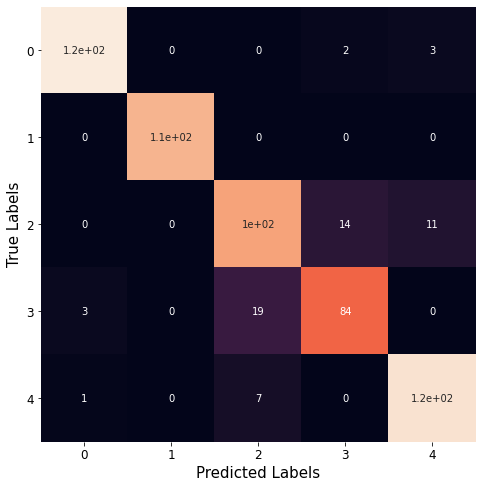

In [32]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [43]:
#XGBoost Classifier
from xgboost.sklearn import XGBClassifier
use_label_encoder=False #To fix an error
clf = XGBClassifier(learning_rate =0.01, n_estimators=1000, max_depth=5,min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,nthread=4, seed=27)
clf.fit(X_train,y_train)

print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))

Train Score 0.959286
Test Score 0.881667


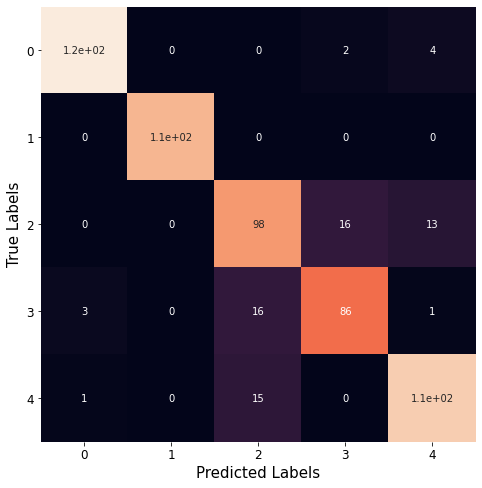

In [44]:
plt.figure(figsize=(12, 8))

xgb_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, xgb_pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

The results obtained by XGBoost Algorithm are more better and accururate than Decision Tree . I also used XGB Algorithm with GridSearchCV but its taking too much time on my system.